**Simple LSTM Model for Stock Price Prediction**

In [2]:
!pip install yfinance
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import yfinance as yf

In [ ]:
# Function to fetch stock data from Yahoo Finance
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Define the stock symbol, start date, and end date
stock_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2022-01-01'

In [ ]:
# Fetch stock data
stock_data = fetch_stock_data(stock_symbol, start_date, end_date)

# Use the 'Close' prices for the time series
data = pd.DataFrame({'time': stock_data.index, 'stock_prices': stock_data['Close']})

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data['stock_prices_scaled'] = scaler.fit_transform(data['stock_prices'].values.reshape(-1, 1))

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Create sequences for training
seq_length = 20  # Length of the sequence for each input data point
X, y = [], []

for i in range(len(data) - seq_length):
    X.append(data['stock_prices_scaled'].iloc[i:i + seq_length].values)
    y.append(data['stock_prices_scaled'].iloc[i + seq_length])

X, y = np.array(X), np.array(y)

# Reshape data for LSTM (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=50, batch_size=32)

Epoch 1/50
16/16 [==============================] - 10s 8ms/step - loss: 0.0850
Epoch 2/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0096
Epoch 3/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0053
Epoch 4/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0030
Epoch 5/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 6/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 7/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 8/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 9/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 10/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 11/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 12/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 13/50
16/16 [=============================

In [ ]:
# Test the model on new data (e.g., predicting future values)
test_data = data['stock_prices_scaled'].values[-seq_length:].reshape(1, -1, 1)
predicted_values = []

for i in range(100):  # Adjust the number of predictions as needed
    predicted_value = model.predict(test_data)
    predicted_values.append(predicted_value[0, 0])
    test_data = np.append(test_data[:, 1:, :], predicted_value.reshape(1, 1, 1), axis=1)

# Inverse transform the predictions to the original scale
predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1))


1/1 [==============================] - 0s 17ms/step


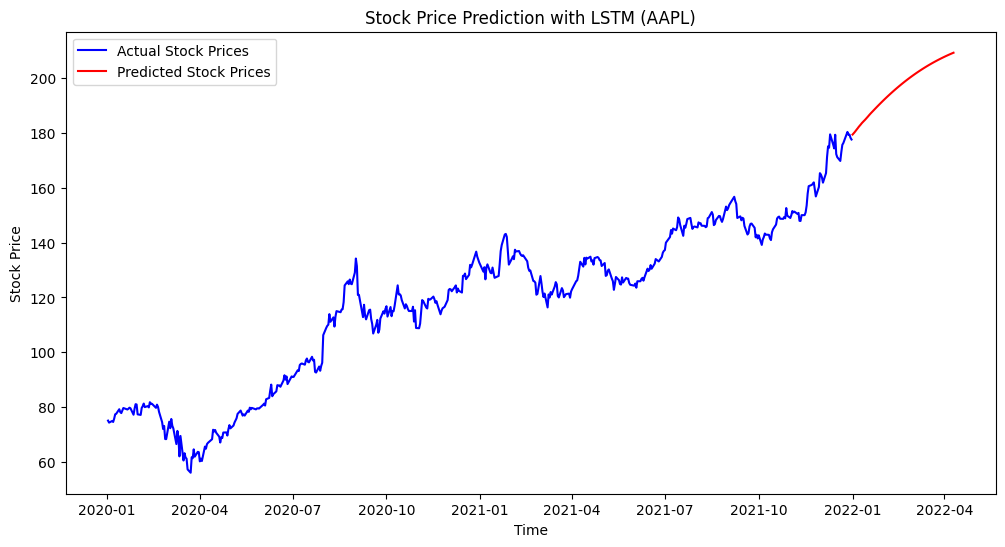

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data['stock_prices'], label='Actual Stock Prices', color='blue')
plt.plot(stock_data.index[-1] + pd.to_timedelta(np.arange(1, 101), unit='D'), predicted_values, label='Predicted Stock Prices', color='red')
plt.title(f'Stock Price Prediction with LSTM ({stock_symbol})')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

**Added Training , Testing Dataset**

[*********************100%%**********************]  1 of 1 completed
Epoch 1/50
75/75 [==============================] - 4s 17ms/step - loss: 0.0080 - val_loss: 2.1519e-04
Epoch 2/50
75/75 [==============================] - 0s 6ms/step - loss: 2.2247e-04 - val_loss: 2.0944e-04
Epoch 3/50
75/75 [==============================] - 1s 7ms/step - loss: 2.3353e-04 - val_loss: 2.2846e-04
Epoch 4/50
75/75 [==============================] - 1s 9ms/step - loss: 2.2003e-04 - val_loss: 2.0116e-04
Epoch 5/50
75/75 [==============================] - 1s 8ms/step - loss: 2.1162e-04 - val_loss: 1.9490e-04
Epoch 6/50
75/75 [==============================] - 1s 9ms/step - loss: 2.1107e-04 - val_loss: 1.9845e-04
Epoch 7/50
75/75 [==============================] - 1s 9ms/step - loss: 2.0020e-04 - val_loss: 1.8696e-04
Epoch 8/50
75/75 [==============================] - 1s 8ms/step - loss: 2.0073e-04 - val_loss: 1.9169e-04
Epoch 9/50
75/75 [==============================] - 0s 6ms/step - loss: 2.0537e-04 - v

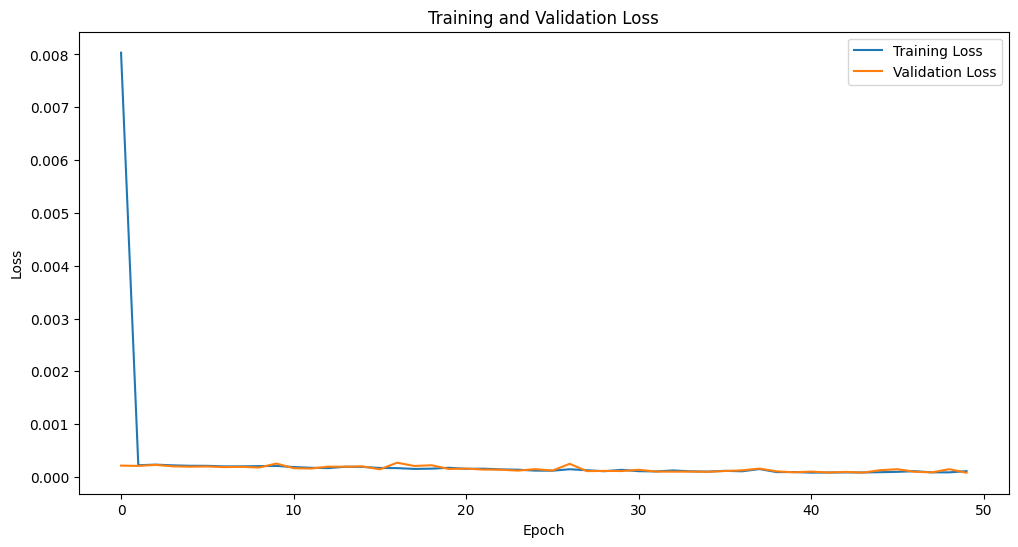

2/2 [==============================] - 1s 10ms/step


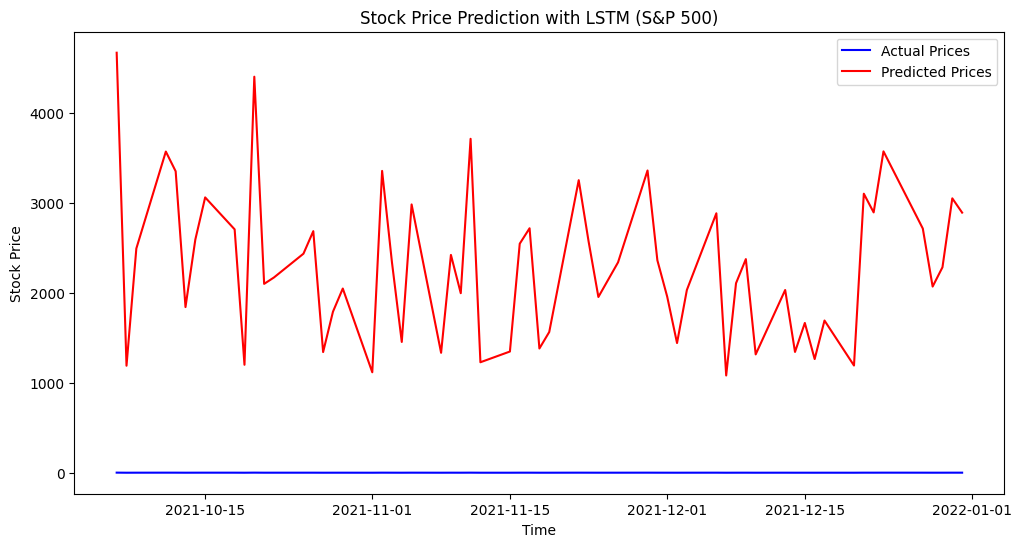

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import yfinance as yf

# Function to fetch stock data from Yahoo Finance
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to preprocess data and split into training, validation, and test sets
def preprocess_and_split(data, seq_length, train_ratio=0.8, val_ratio=0.1):
    scaler = MinMaxScaler(feature_range=(0, 1))
    data['scaled'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data['scaled'].iloc[i:i + seq_length].values)
        y.append(data['scaled'].iloc[i + seq_length])

    X, y = np.array(X), np.array(y)

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1 - train_ratio, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=val_ratio / (val_ratio + (1 - val_ratio)), random_state=42)

    return X_train, y_train, X_val, y_val, X_test, y_test, scaler

# Build the LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to train the model
def train_model(model, X_train, y_train, X_val, y_val, epochs, batch_size):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=1)
    return history

# Function to plot training history
def plot_history(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Function to make predictions on the test set
def make_predictions(model, X_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    return predictions

# Define stock symbol, start date, and end date
stock_symbol = '^GSPC'  # S&P 500 index
start_date = '2010-01-01'
end_date = '2022-01-01'

# Fetch stock data
stock_data = fetch_stock_data(stock_symbol, start_date, end_date)

# Set sequence length
seq_length = 20

# Preprocess data and split into training, validation, and test sets
X_train, y_train, X_val, y_val, X_test, y_test, scaler = preprocess_and_split(stock_data, seq_length)

# Reshape data for LSTM
input_shape = (X_train.shape[1], 1)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build and train the LSTM model
model = build_lstm_model(input_shape)
history = train_model(model, X_train, y_train, X_val, y_val, epochs=50, batch_size=32)

# Plot training history
plot_history(history)

# Make predictions on the test set
predictions = make_predictions(model, X_test, scaler)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index[-len(predictions):], y_test, label='Actual Prices', color='blue')
plt.plot(stock_data.index[-len(predictions):], predictions, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction with LSTM (S&P 500)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


**Prediction using LSTM-GRU**

[*********************100%%**********************]  1 of 1 completed
Epoch 1/50
75/75 [==============================] - 7s 26ms/step - loss: 0.0099 - val_loss: 2.5035e-04
Epoch 2/50
75/75 [==============================] - 1s 7ms/step - loss: 2.8673e-04 - val_loss: 3.0801e-04
Epoch 3/50
75/75 [==============================] - 1s 7ms/step - loss: 2.6405e-04 - val_loss: 2.6138e-04
Epoch 4/50
75/75 [==============================] - 1s 7ms/step - loss: 2.7819e-04 - val_loss: 2.2323e-04
Epoch 5/50
75/75 [==============================] - 1s 8ms/step - loss: 2.5363e-04 - val_loss: 2.7199e-04
Epoch 6/50
75/75 [==============================] - 1s 7ms/step - loss: 2.2812e-04 - val_loss: 2.2087e-04
Epoch 7/50
75/75 [==============================] - 1s 8ms/step - loss: 2.4529e-04 - val_loss: 2.0234e-04
Epoch 8/50
75/75 [==============================] - 1s 9ms/step - loss: 2.1095e-04 - val_loss: 1.8968e-04
Epoch 9/50
75/75 [==============================] - 1s 8ms/step - loss: 2.0069e-04 - v

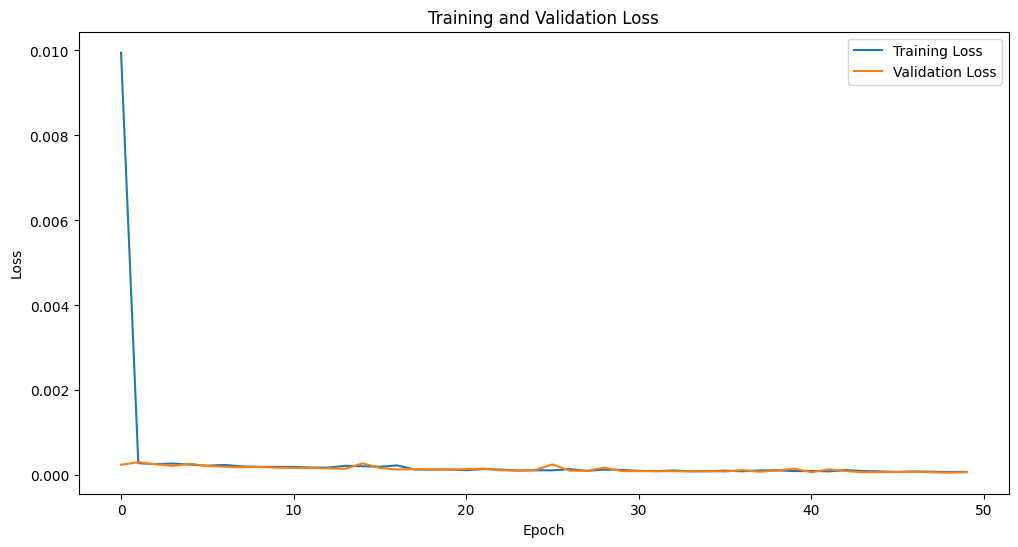

2/2 [==============================] - 1s 8ms/step


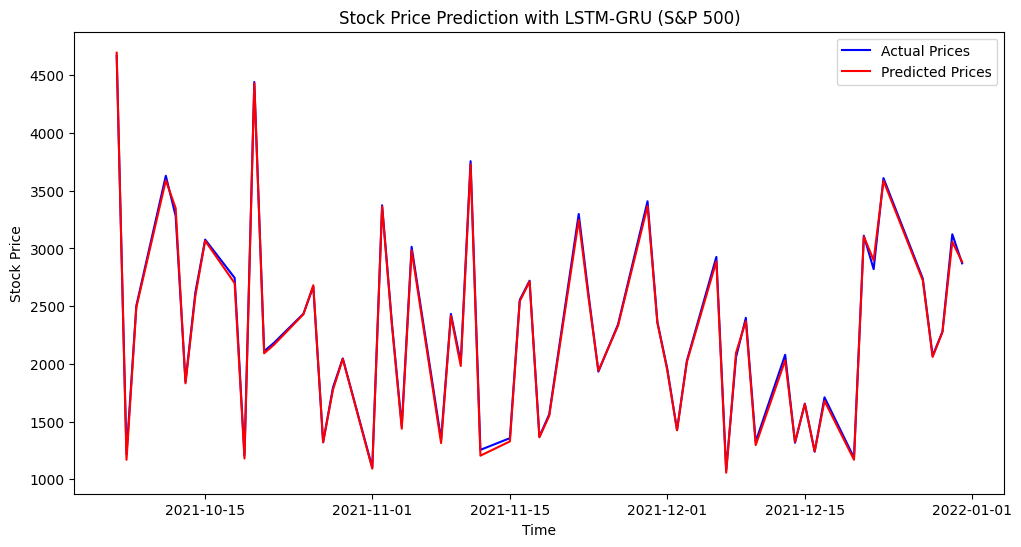

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
import yfinance as yf

# Function to fetch stock data from Yahoo Finance
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to preprocess data and split into training, validation, and test sets
def preprocess_and_split(data, seq_length, train_ratio=0.8, val_ratio=0.1):
    scaler = MinMaxScaler(feature_range=(0, 1))
    data['scaled'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data['scaled'].iloc[i:i + seq_length].values)
        y.append(data['scaled'].iloc[i + seq_length])

    X, y = np.array(X), np.array(y)

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1 - train_ratio, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=val_ratio / (val_ratio + (1 - val_ratio)), random_state=42)

    return X_train, y_train, X_val, y_val, X_test, y_test, scaler

# Build the LSTM-GRU model
def build_lstm_gru_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(GRU(units=50, return_sequences=True))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to train the model
def train_model(model, X_train, y_train, X_val, y_val, epochs, batch_size):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=1)
    return history

# Function to plot training history
def plot_history(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Function to make predictions on the test set
def make_predictions(model, X_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
    return predictions

# Define stock symbol, start date, and end date
stock_symbol = '^GSPC'  # S&P 500 index
start_date = '2010-01-01'
end_date = '2022-01-01'

# Fetch stock data
stock_data = fetch_stock_data(stock_symbol, start_date, end_date)

# Set sequence length
seq_length = 20

# Preprocess data and split into training, validation, and test sets
X_train, y_train, X_val, y_val, X_test, y_test, scaler = preprocess_and_split(stock_data, seq_length)

# Reshape data for LSTM-GRU
input_shape = (X_train.shape[1], 1)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build and train the LSTM-GRU model
model = build_lstm_gru_model(input_shape)
history = train_model(model, X_train, y_train, X_val, y_val, epochs=50, batch_size=32)

# Plot training history
plot_history(history)

# Make predictions on the test set
predictions = make_predictions(model, X_test, scaler)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index[-len(predictions):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Prices', color='blue')
plt.plot(stock_data.index[-len(predictions):], predictions, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction with LSTM-GRU (S&P 500)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


**Increasing the complexity of the model and acccuracy**

[*********************100%%**********************]  1 of 1 completed
Epoch 1/50
75/75 [==============================] - 24s 49ms/step - loss: 0.0201 - mae: 0.0916 - val_loss: 0.0018 - val_mae: 0.0316
Epoch 2/50
75/75 [==============================] - 1s 13ms/step - loss: 0.0057 - mae: 0.0500 - val_loss: 9.7689e-04 - val_mae: 0.0230
Epoch 3/50
75/75 [==============================] - 1s 13ms/step - loss: 0.0050 - mae: 0.0466 - val_loss: 7.2959e-04 - val_mae: 0.0200
Epoch 4/50
75/75 [==============================] - 1s 13ms/step - loss: 0.0048 - mae: 0.0458 - val_loss: 0.0015 - val_mae: 0.0316
Epoch 5/50
75/75 [==============================] - 1s 13ms/step - loss: 0.0049 - mae: 0.0474 - val_loss: 0.0021 - val_mae: 0.0350
Epoch 6/50
75/75 [==============================] - 1s 13ms/step - loss: 0.0047 - mae: 0.0448 - val_loss: 0.0016 - val_mae: 0.0319
Epoch 7/50
75/75 [==============================] - 1s 14ms/step - loss: 0.0045 - mae: 0.0450 - val_loss: 5.2438e-04 - val_mae: 0.0162
E

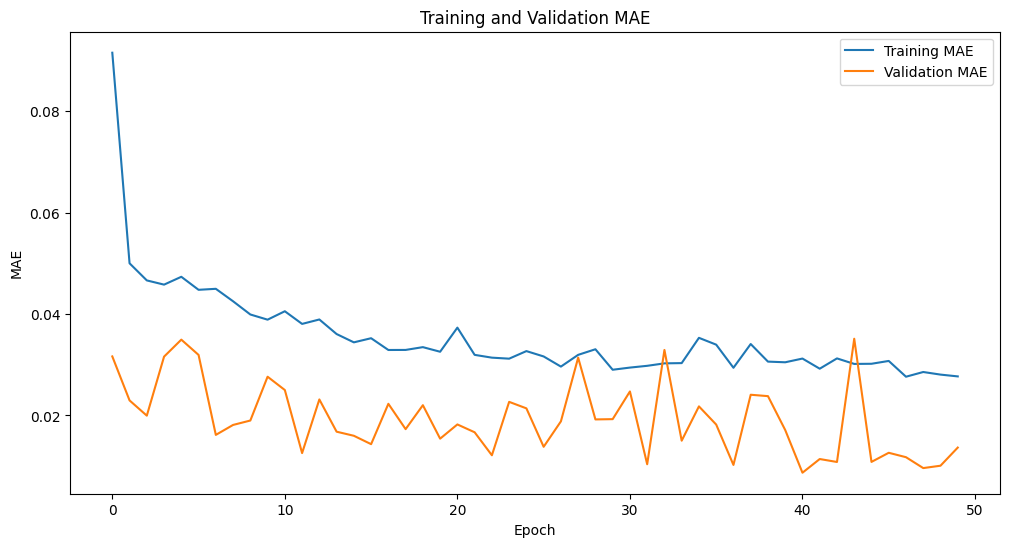

2/2 [==============================] - 2s 10ms/step


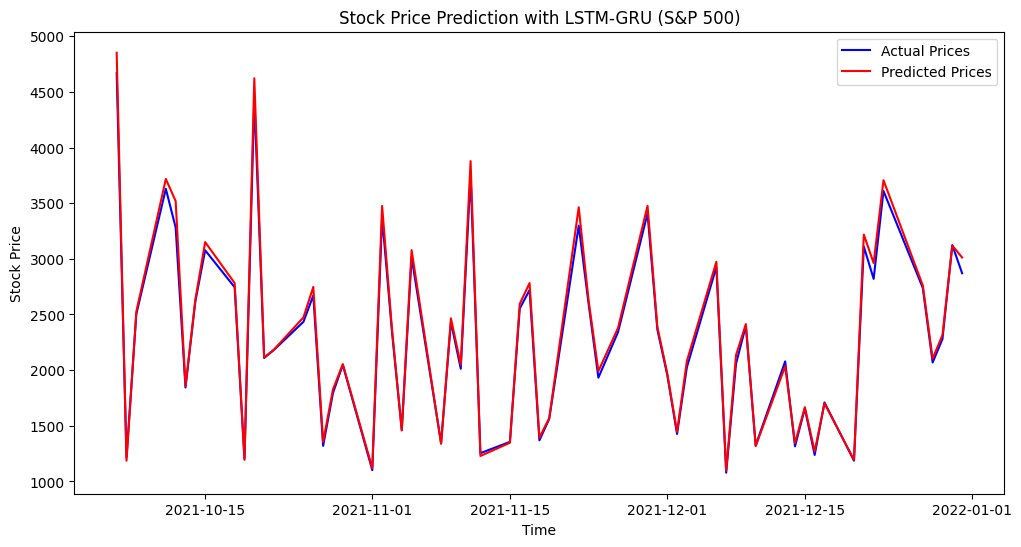

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
import yfinance as yf

# Function to fetch stock data from Yahoo Finance
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to preprocess data and split into training, validation, and test sets
def preprocess_and_split(data, seq_length, train_ratio=0.8, val_ratio=0.1):
    scaler = MinMaxScaler(feature_range=(0, 1))
    data['scaled'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data['scaled'].iloc[i:i + seq_length].values)
        y.append(data['scaled'].iloc[i + seq_length])

    X, y = np.array(X), np.array(y)

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1 - train_ratio, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=val_ratio / (val_ratio + (1 - val_ratio)), random_state=42)

    return X_train, y_train, X_val, y_val, X_test, y_test, scaler

# Build the LSTM-GRU model
def build_complex_lstm_gru_model(input_shape):
    model = Sequential()

    # LSTM layers
    model.add(LSTM(units=100, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=100, return_sequences=True))
    model.add(LSTM(units=100, return_sequences=True))

    # GRU layers
    model.add(GRU(units=100, return_sequences=True))
    model.add(GRU(units=100, return_sequences=True))

    # LSTM layer
    model.add(LSTM(units=100))

    # Dense layers
    model.add(Dense(units=100, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    model.add(Dense(units=1))  # Output layer

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to train the model
def train_model(model, X_train, y_train, X_val, y_val, epochs, batch_size):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=1)
    return history

# Function to plot training history (MAE)
def plot_mae_history(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Training and Validation MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()
    plt.show()

# Function to make predictions on the test set
def make_predictions(model, X_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
    return predictions

# Define stock symbol, start date, and end date
stock_symbol = '^GSPC'  # S&P 500 index
start_date = '2010-01-01'
end_date = '2022-01-01'

# Fetch stock data
stock_data = fetch_stock_data(stock_symbol, start_date, end_date)

# Set sequence length
seq_length = 20

# Preprocess data and split into training, validation, and test sets
X_train, y_train, X_val, y_val, X_test, y_test, scaler = preprocess_and_split(stock_data, seq_length)

# Reshape data for LSTM-GRU
input_shape = (X_train.shape[1], 1)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build and train the LSTM-GRU model
model = build_complex_lstm_gru_model(input_shape)
history = train_model(model, X_train, y_train, X_val, y_val, epochs=50, batch_size=32)

# Plot training history (MAE)
plot_mae_history(history)

# Make predictions on the test set
predictions = make_predictions(model, X_test, scaler)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index[-len(predictions):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Prices', color='blue')
plt.plot(stock_data.index[-len(predictions):], predictions, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction with LSTM-GRU (S&P 500)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()



**Predicting the values**

[*********************100%%**********************]  1 of 1 completed
98/98 [==============================] - 1s 5ms/step
Mean Absolute Error (MAE) on the test set: 2.61732941491961


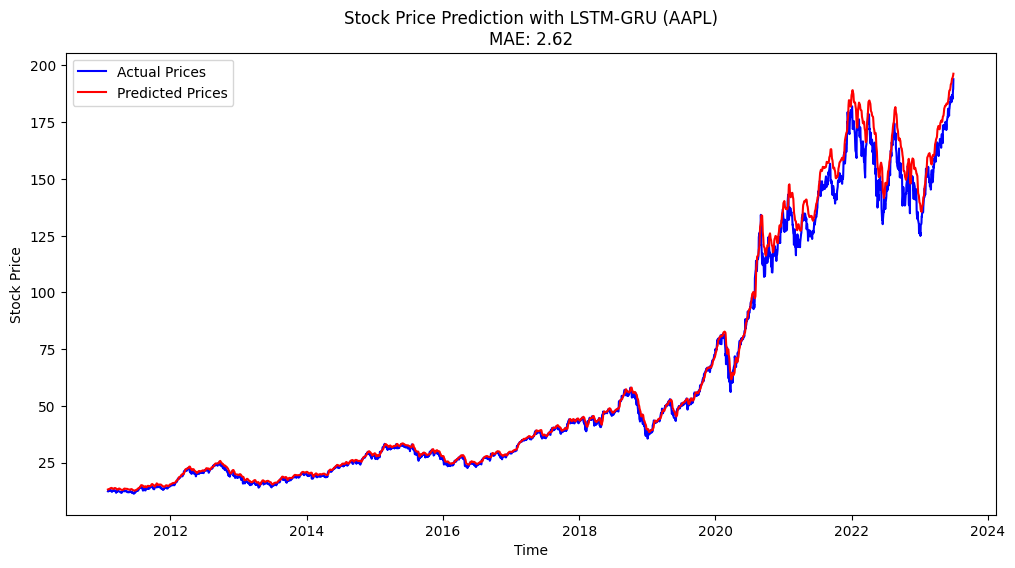

In [ ]:
from sklearn.metrics import mean_absolute_error

def preprocess_and_split_test(data, seq_length):
    scaler = MinMaxScaler(feature_range=(0, 1))
    # Use the provided scaler to transform the testing data
    data['scaled'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

    X_test, y_test = [], []
    for i in range(len(data) - seq_length):
        X_test.append(data['scaled'].iloc[i:i + seq_length].values)
        y_test.append(data['scaled'].iloc[i + seq_length])

    X_test, y_test = np.array(X_test), np.array(y_test)

    return X_test, y_test, scaler

# Define a new stock symbol, start date, and end date for testing
test_stock_symbol = 'AAPL'
test_start_date = '2011-01-01'
test_end_date = '2023-07-01'

# Fetch stock data for testing
test_stock_data = fetch_stock_data(test_stock_symbol, test_start_date, test_end_date)

# Use the existing scaler from the training phase
X_test_new, y_test_new, scaler = preprocess_and_split_test(test_stock_data, seq_length)

# Reshape data for LSTM-GRU
X_test_new = np.reshape(X_test_new, (X_test_new.shape[0], X_test_new.shape[1], 1))

# Make predictions on the new test set
predictions_new = make_predictions(model, X_test_new, scaler)

# Inverse transform the actual values for computing MAE
actual_prices = scaler.inverse_transform(y_test_new.reshape(-1, 1))

# Compute MAE
mae = mean_absolute_error(actual_prices, predictions_new)
print(f'Mean Absolute Error (MAE) on the test set: {mae}')

# Plot the results for the new test set
plt.figure(figsize=(12, 6))
plt.plot(test_stock_data.index[-len(predictions_new):], actual_prices, label='Actual Prices', color='blue')
plt.plot(test_stock_data.index[-len(predictions_new):], predictions_new, label='Predicted Prices', color='red')
plt.title(f'Stock Price Prediction with LSTM-GRU ({test_stock_symbol})\nMAE: {mae:.2f}')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

**Predicting Future Values**

[*********************100%%**********************]  1 of 1 completed
Epoch 1/100
139/139 [==============================] - 13s 19ms/step - loss: 7.2440e-04 - mae: 0.0164
Epoch 2/100
139/139 [==============================] - 3s 21ms/step - loss: 3.7837e-04 - mae: 0.0130
Epoch 3/100
139/139 [==============================] - 2s 15ms/step - loss: 3.2170e-04 - mae: 0.0123
Epoch 4/100
139/139 [==============================] - 2s 16ms/step - loss: 2.7226e-04 - mae: 0.0117
Epoch 5/100
139/139 [==============================] - 2s 15ms/step - loss: 2.4251e-04 - mae: 0.0110
Epoch 6/100
139/139 [==============================] - 2s 15ms/step - loss: 2.3592e-04 - mae: 0.0109
Epoch 7/100
139/139 [==============================] - 3s 19ms/step - loss: 2.2399e-04 - mae: 0.0107
Epoch 8/100
139/139 [==============================] - 3s 21ms/step - loss: 2.1345e-04 - mae: 0.0106
Epoch 9/100
139/139 [==============================] - 2s 16ms/step - loss: 2.5170e-04 - mae: 0.0113
Epoch 10/100
139/139 

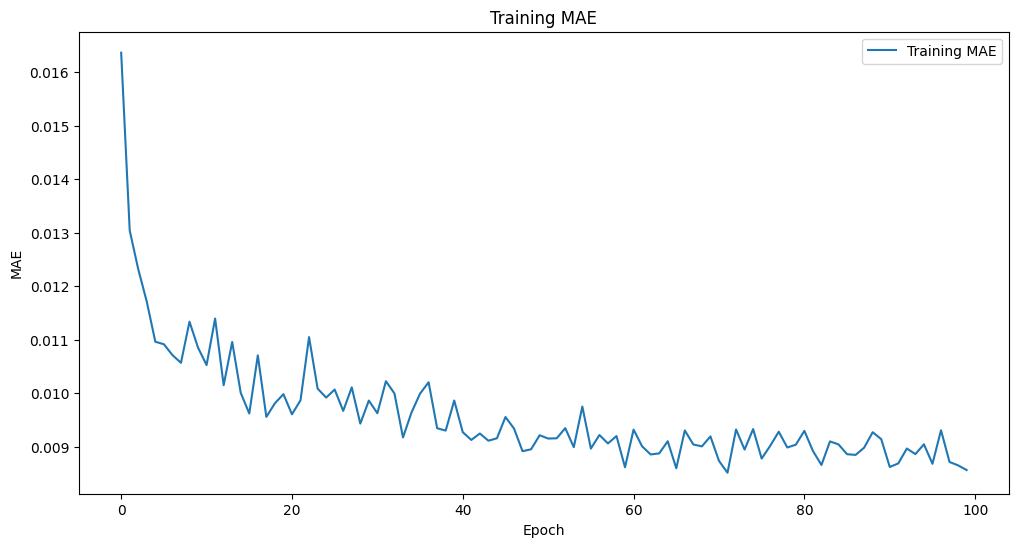

1/1 [==============================] - 0s 27ms/step


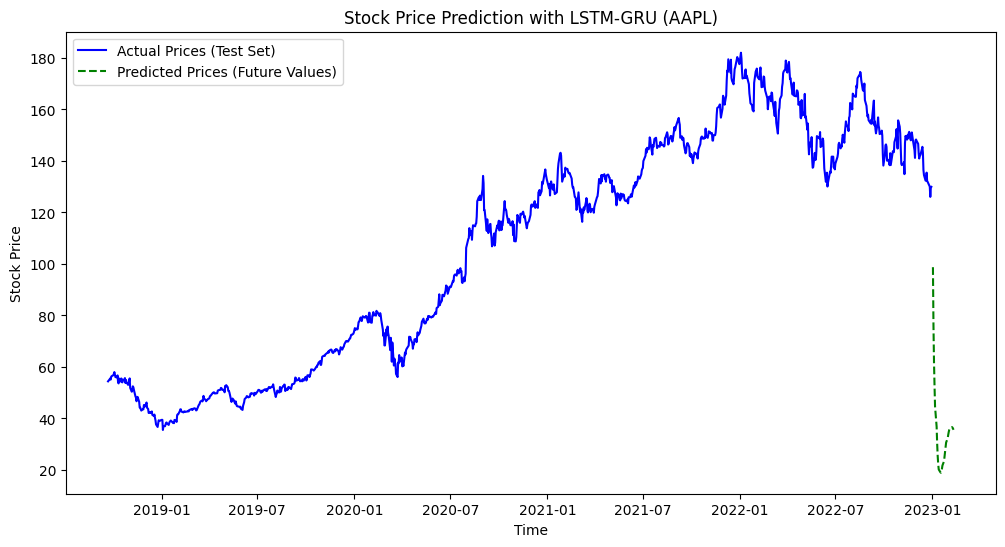

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
import yfinance as yf

# Function to fetch stock data from Yahoo Finance
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to preprocess data and split into training and test sets
def preprocess_and_split(data, seq_length, train_ratio=0.8):
    scaler = MinMaxScaler(feature_range=(0, 1))
    data['scaled'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data['scaled'].iloc[i:i + seq_length].values)
        y.append(data['scaled'].iloc[i + seq_length])

    X, y = np.array(X), np.array(y)

    # Split data into training and test sets
    split_index = int(len(data) * train_ratio)
    X_train, X_test, y_train, y_test = X[:split_index], X[split_index:], y[:split_index], y[split_index:]

    return X_train, y_train, X_test, y_test, scaler

# Build the LSTM-GRU model
def build_complex_lstm_gru_model(input_shape):
    model = Sequential()

    # LSTM layers
    model.add(LSTM(units=100, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=100, return_sequences=True))
    model.add(LSTM(units=100, return_sequences=True))

    # GRU layers
    model.add(GRU(units=100, return_sequences=True))
    model.add(GRU(units=100, return_sequences=True))

    # LSTM layer
    model.add(LSTM(units=100))

    # Dense layers
    model.add(Dense(units=100, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    model.add(Dense(units=1))  # Output layer

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to train the model
def train_model(model, X_train, y_train, epochs, batch_size):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    return history

# Function to plot training history (MAE)
def plot_mae_history(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['mae'], label='Training MAE')
    plt.title('Training MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()
    plt.show()

# Function to make predictions on the test set
def make_predictions(model, X_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
    return predictions

# Define stock symbol, start date, and end date
stock_symbol = 'AAPL'
start_date = '2001-01-01'
current_date = '2023-01-01'
end_date = '2023-04-01'  # End date for testing (3 months into the future)

# Fetch stock data
stock_data = fetch_stock_data(stock_symbol, start_date, current_date)

# Set sequence length
seq_length = 30

# Preprocess data and split into training and test sets
X_train, y_train, X_test, y_test, scaler = preprocess_and_split(stock_data, seq_length)

# Reshape data for LSTM-GRU
input_shape = (X_train.shape[1], 1)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build and train the LSTM-GRU model
model = build_complex_lstm_gru_model(input_shape)
history = train_model(model, X_train, y_train, epochs=100, batch_size=32)

# Plot training history (MAE)
plot_mae_history(history)

# Test the model on new data (e.g., predicting future values)
test_data = X_test[-1].reshape(1, -1, 1)  # Use the last sequence from the test set
predicted_values = []

for i in range(30):  # Adjust the number of predictions as needed (3 months * 30 days)
    predicted_value = model.predict(test_data)
    predicted_values.append(predicted_value[0, 0])
    test_data = np.append(test_data[:, 1:, :], predicted_value.reshape(1, 1, 1), axis=1)

# Inverse transform the predictions to the original scale
predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1))

# Extend the time index for the new predictions
prediction_index = pd.date_range(start=current_date, periods=len(predicted_values), freq='B')

# Plot the results
plt.figure(figsize=(12, 6))

# Plot actual prices from the test set
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
plt.plot(stock_data.index[-len(actual_prices):], actual_prices, label='Actual Prices (Test Set)', color='blue')

# Plot predicted prices for the future
plt.plot(prediction_index, predicted_values, label='Predicted Prices (Future Values)', color='green', linestyle='dashed')

plt.title(f'Stock Price Prediction with LSTM-GRU ({stock_symbol})')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

[What is LSTM and GRU and code for above task](https://chat.openai.com/share/3f9a4e14-485c-4236-b23d-feca784010b2)

[Maths and Architecture Behind it](https://chat.openai.com/share/f403a2b1-252f-43e5-9c08-b057bf7d6ea6)

[How to increase complexity of the model](https://chat.openai.com/share/a65c4616-6f98-4aa8-afc6-094131962ae6)

[More about how the model is getting trained](https://chat.openai.com/share/f2b1f344-aeb4-4a9e-8ecc-d7e45d7018ad)

[Loss functions Types](https://chat.openai.com/share/23a739b1-5add-4225-b4cb-8a859781b127)